<a href="https://colab.research.google.com/github/Yeshiwas-Yalew/Hossana-Trafic-management-/blob/main/cropYield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Logistic regression in ML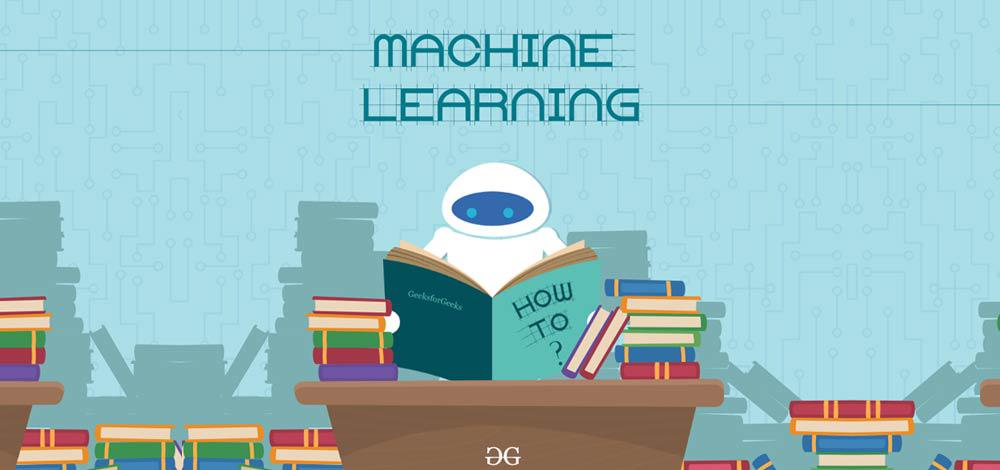***

In [ ]:
!git clone https://github.com/cleipski/CropPredict

Cloning into 'CropPredict'...
remote: Enumerating objects: 164, done.
remote: Total 164 (delta 0), reused 0 (delta 0), pack-reused 164 (from 1)
Receiving objects: 100% (164/164), 6.31 MiB | 12.12 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [ ]:
!git clone https://github.com/danielchristopher513/Crop_Recommendation_Using_Machine_Learning

Cloning into 'Crop_Recommendation_Using_Machine_Learning'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 7.17 MiB | 10.68 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df=pd.read_csv('/content/Crop_Recommendation_Using_Machine_Learning/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical values
df['label'] = LabelEncoder().fit_transform(df['label'])
print(df)
df.shape

        N   P   K  temperature   humidity        ph    rainfall  label
0      90  42  43    20.879744  82.002744  6.502985  202.935536     20
1      85  58  41    21.770462  80.319644  7.038096  226.655537     20
2      60  55  44    23.004459  82.320763  7.840207  263.964248     20
3      74  35  40    26.491096  80.158363  6.980401  242.864034     20
4      78  42  42    20.130175  81.604873  7.628473  262.717340     20
...   ...  ..  ..          ...        ...       ...         ...    ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507      5
2196   99  15  27    27.417112  56.636362  6.086922  127.924610      5
2197  118  33  30    24.131797  67.225123  6.362608  173.322839      5
2198  117  32  34    26.272418  52.127394  6.758793  127.175293      5
2199  104  18  30    23.603016  60.396475  6.779833  140.937041      5

[2200 rows x 8 columns]


(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
dkf=pd.DataFrame(df)

In [ ]:
numeric_df = df.select_dtypes(include='number')

In [ ]:
correlation_matrix = numeric_df.corr()

<Axes: >

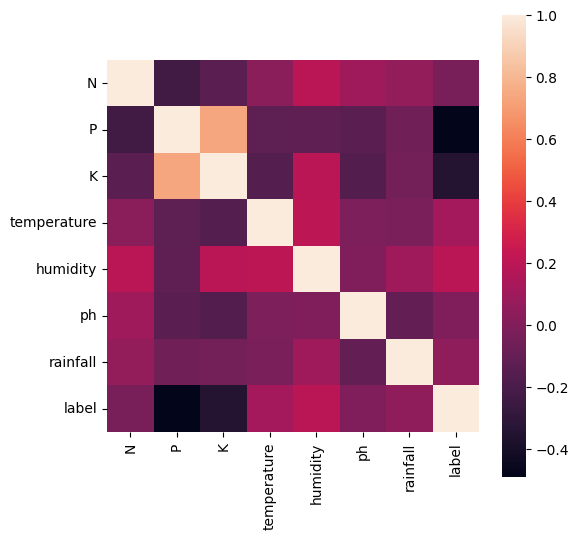

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(data=correlation_matrix,cbar=True,square=True,annot=False,annot_kws={"size":8})

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['label'],axis=1)
y=df['label']

In [ ]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
x

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
model = LogisticRegression(max_iter=15)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=15)

In [ ]:
y_predict=model.predict(x_test)
r2_score(y_test,y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [ ]:
input= np.array([ 13 , 60 , 25  ,  417.13693 , 20.59542 , 51.6285972 , 208.2569 ])
reshaped_input=input.reshape(1,-1)
prediction=model.predict(reshaped_input)
print(f"you are recommended to cultivate {prediction[0]}")


you are recommended to cultivate 17
